In [1]:
import os, sys, importlib
import copy
sys.path.append('/content/drive/My Drive/Research/qutip_sim/custom_files')
sys.path.append('/content/drive/My Drive/Research/qutip_sim/custom_files/VQE_files')
sys.path.append('/content/drive/My Drive/Research/qutip_sim/site-packages')
sys.path.append('/content/drive/My Drive/Research/qutip_sim/site-packages/qutip')
from H2Functions import read_in_data
from qutip import *
!pip install scikit-optimize
from analysis_tools import *
from sim_functions import *
from experiment_sim import *

import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
%load_ext autoreload 
%autoreload 2

label = ["II", "IX", "IY", "IZ", "XI", "XX", "XY", "XZ", "YI", "YX", "YY", "YZ", "ZI", "ZX", "ZY", "ZZ"]

     |████████████████████████████████| 102kB 3.5MB/s 


# Data import

In [2]:
directory = '/content/drive/My Drive/Research/Data/Experiment/Echo_test/pulse_train'
file_name = '-conditional_echotest_joint_readout.run/z_joint.npy'
file_list = range(76,105,4)

pulse_train = load_oqclab(directory, file_name, file_list)

directory = '/content/drive/My Drive/Research/Data/Experiment/Echo_test/echo'
file_name = '-conditional_echotest_joint_readout.run/z_joint.npy'
file_list = range(156,185,4)

echo = load_oqclab(directory, file_name, file_list)

directory = '/content/drive/My Drive/Research/Data/Experiment/Echo_test/long_echo'
file_name = '-conditional_echotest_joint_readout.run/z_joint.npy'
file_list = range(60,89,4)

long_echo = load_oqclab(directory, file_name, file_list)

directory = '/content/drive/My Drive/Research/Data/Experiment/Echo_test/ramsey'
file_name = '-conditional_echotest_joint_readout.run/z_joint.npy'
file_list = range(108,137,4)

ramsey = load_oqclab(directory, file_name, file_list)

directory = '/content/drive/My Drive/Research/Data/Experiment/Echo_test/tail'
file_name = '-conditional_echotest_joint_readout.run/z_joint.npy'
file_list = range(140,153,4)

tail = load_oqclab(directory, file_name, file_list)



In [73]:
print(len(long_echo))
print(np.shape(long_echo[0]))

4
(100,)


# Pulse train

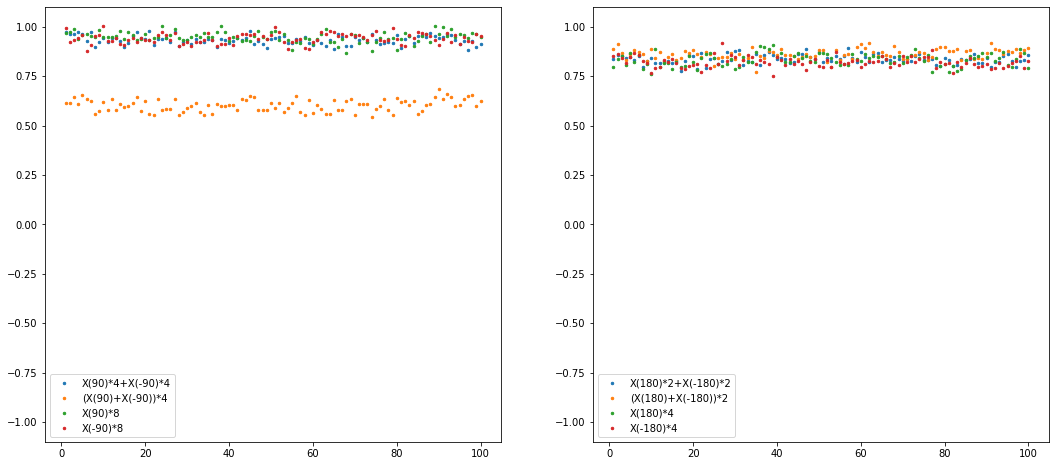

In [54]:
labels = ['X(90)*4+X(-90)*4', '(X(90)+X(-90))*4', 'X(90)*8', 'X(-90)*8']
x = np.linspace(1,100,100)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
for i in range(4):
  axes[0].scatter(x, pulse_train[i], s=6, label=labels[i])
axes[0].set_ylim(-1.1,1.1)
axes[0].legend()

labels = ['X(180)*2+X(-180)*2', '(X(180)+X(-180))*2', 'X(180)*4', 'X(-180)*4']

for i in range(4):
  axes[1].scatter(x, pulse_train[i+4], s=6, label=labels[i])
axes[1].set_ylim(-1.1,1.1)
axes[1].legend()
plt.show()

# Ramsey

/content/drive/My Drive/Research/qutip_sim/custom_files/analysis_tools/operation.py:191: RuntimeWarning: divide by zero encountered in true_divide
  fit = amp*np.exp(-t/decay)*np.sin(2.*np.pi*omega*t+phi)+offset
/content/drive/My Drive/Research/qutip_sim/custom_files/analysis_tools/operation.py:191: RuntimeWarning: invalid value encountered in true_divide
  fit = amp*np.exp(-t/decay)*np.sin(2.*np.pi*omega*t+phi)+offset


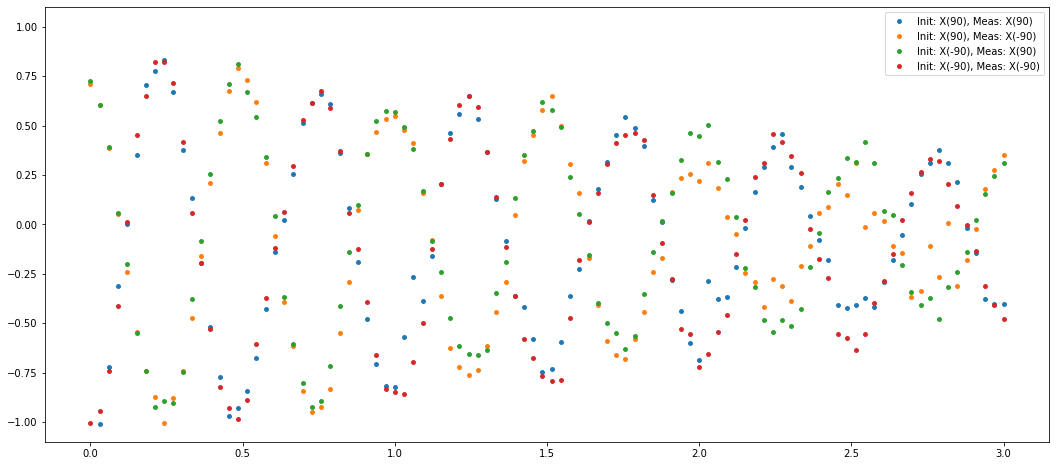

In [64]:
# labels = labels = ['Init: X(90), Meas: X(90)', 'Init: X(90), Meas: X(-90)', 'Init: X(90), Meas: X(-90)', 'Init: X(90), Meas: X(-90)']
# x = np.linspace(0,3.,100)
# for i in range(4):
#   plt.scatter(x, ramsey[i], s=3, label=labels[i])
# plt.ylim(-1.1,1.1)
# plt.legend()
# plt.show()

labels = ['Init: X(90), Meas: X(90)', 'Init: X(90), Meas: X(-90)', 'Init: X(-90), Meas: X(90)', 'Init: X(-90), Meas: X(-90)']
x = np.linspace(0,3.,100)
dt = x[1] - x[0]
fig = plt.figure(figsize=(18,8))
for i in range(4):
  fit_y = Fit_1D_Freq_Gaussian_Estimation(ramsey[i+4], dt, gaussian_window_std = 0.2)
  func = fit_y['func']
  # ub, lb = error_bar(fit_y['popt'], fit_y['pcov'])
  fit_x = np.linspace(x[0], x[-1], 1001)
  # plt.fill_between(fit_x, func(fit_x, *ub), func(fit_x, *lb), color='b', alpha=0.2)
  # plt.plot(fit_x, func(fit_x, *fit_y['popt']))
  plt.scatter(x, ramsey[i+4], s=15, label=labels[i])
plt.ylim(-1.1,1.1)
plt.legend()
plt.show()

# Echo

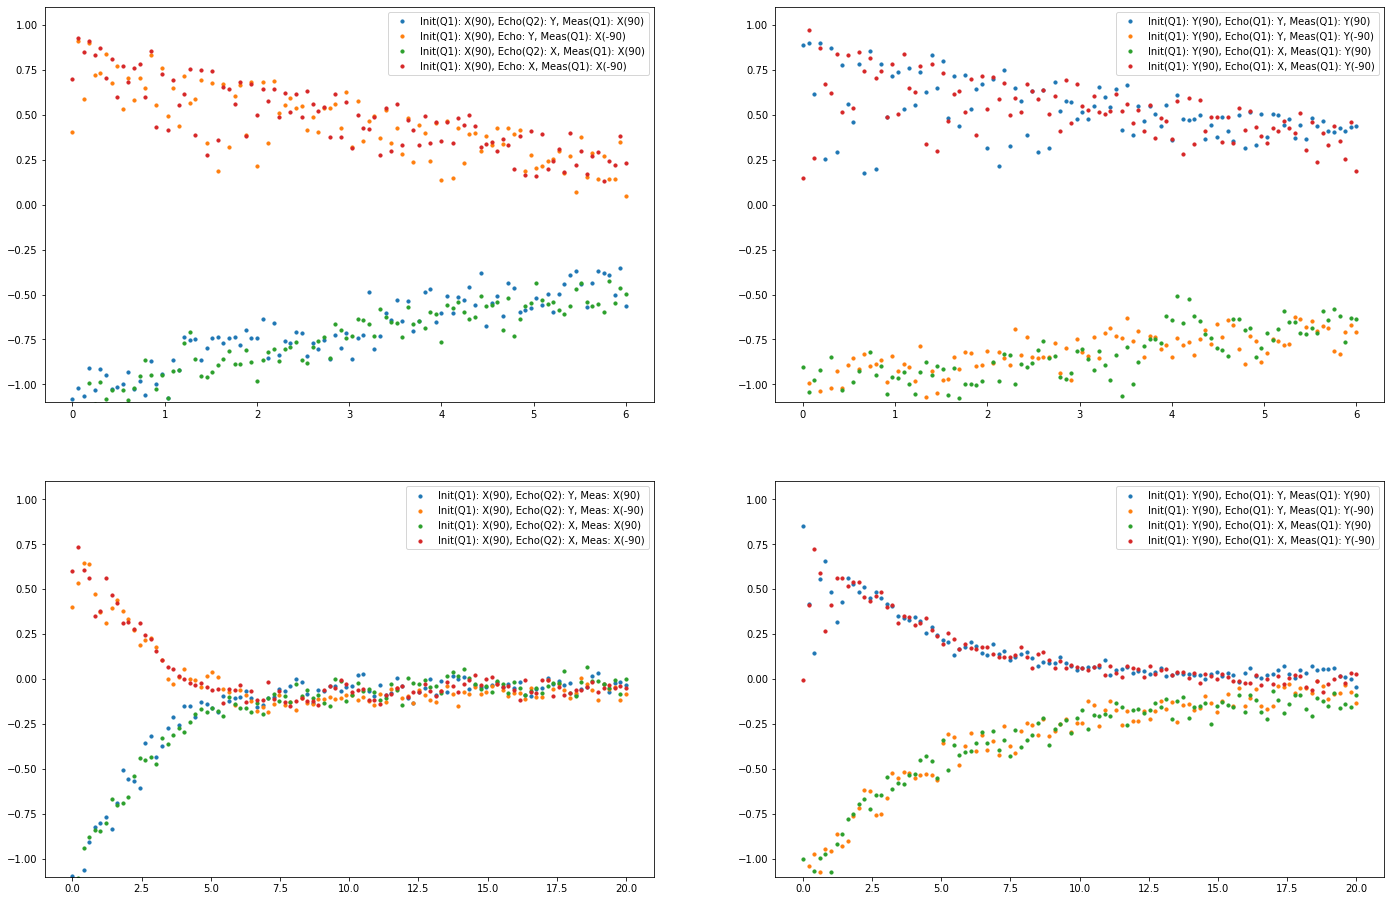

In [8]:
labels = ['Init(Q1): X(90), Echo(Q2): Y, Meas(Q1): X(90)', 'Init(Q1): X(90), Echo: Y, Meas(Q1): X(-90)', 
          'Init(Q1): X(90), Echo(Q2): X, Meas(Q1): X(90)', 'Init(Q1): X(90), Echo: X, Meas(Q1): X(-90)']
x = np.linspace(0,6.,100)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24,16))
for i in range(4):
  axes[0,0].scatter(x, echo[i], s=10, label=labels[i])
axes[0,0].set_ylim(-1.1,1.1)
axes[0,0].legend()

labels = ['Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(90)', 'Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(-90)', 
          'Init(Q1): Y(90), Echo(Q1): X, Meas(Q1): Y(90)', 'Init(Q1): Y(90), Echo(Q1): X, Meas(Q1): Y(-90)']

for i in range(4):
  axes[0,1].scatter(x, echo[i+4], s=10, label=labels[i])
axes[0,1].set_ylim(-1.1,1.1)
axes[0,1].legend()

labels = ['Init(Q1): X(90), Echo(Q2): Y, Meas: X(90)', 'Init(Q1): X(90), Echo(Q2): Y, Meas: X(-90)', 
          'Init(Q1): X(90), Echo(Q2): X, Meas: X(90)', 'Init(Q1): X(90), Echo(Q2): X, Meas: X(-90)']
x = np.linspace(0,20.,100)
for i in range(4):
  axes[1,0].scatter(x, long_echo[i], s=10, label=labels[i])
axes[1,0].set_ylim(-1.1,1.1)
axes[1,0].legend()

labels = ['Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(90)', 'Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(-90)', 
          'Init(Q1): Y(90), Echo(Q1): X, Meas(Q1): Y(90)', 'Init(Q1): Y(90), Echo(Q1): X, Meas(Q1): Y(-90)']

for i in range(4):
  axes[1,1].scatter(x, long_echo[i+4], s=10, label=labels[i])
axes[1,1].set_ylim(-1.1,1.1)
axes[1,1].legend()
plt.show()

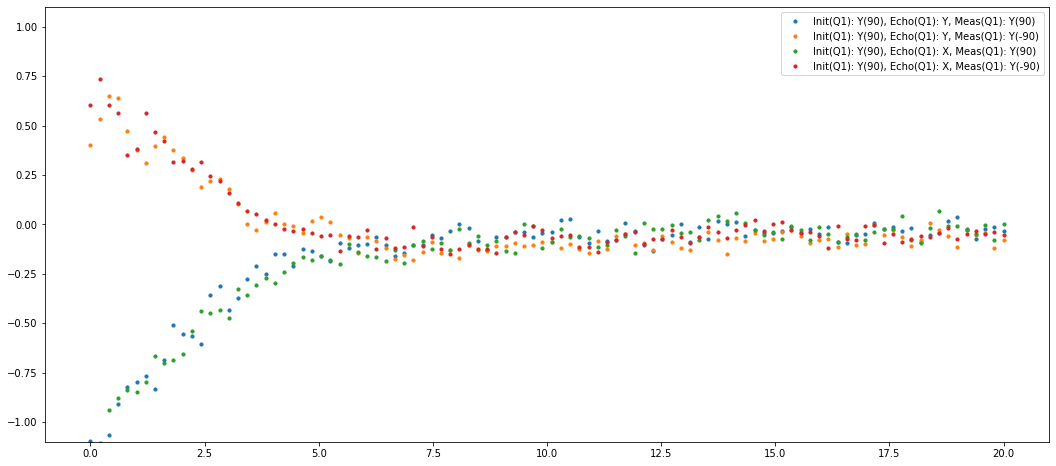

In [6]:
x = np.linspace(0,20.,100)
fig = plt.figure(figsize=(18,8))
for i in range(4):
  plt.scatter(x, long_echo[i], s=10, label=labels[i])
plt.ylim(-1.1,1.1)
plt.legend()
plt.show()

# Tail

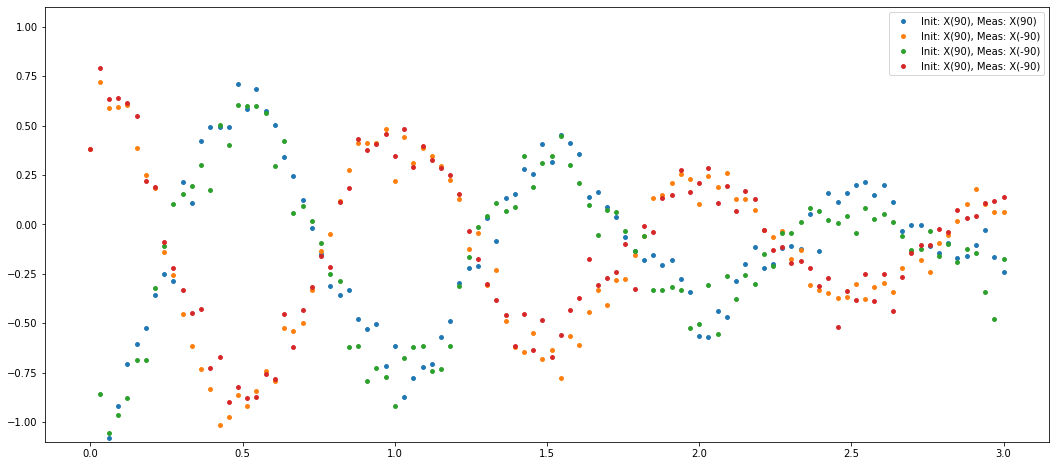

In [50]:
labels = labels = ['Init: X(90), Meas: X(90)', 'Init: X(90), Meas: X(-90)', 'Init: X(90), Meas: X(-90)', 'Init: X(90), Meas: X(-90)']
x = np.linspace(0,3.,100)
fit = plt.figure(figsize=(18,8))
for i in range(4):
  plt.scatter(x, tail[i], s=15, label=labels[i])
plt.ylim(-1.1,1.1)
plt.legend()
plt.show()

# Pi/2 *3 test and 

In [4]:
for i in range(80,97,4):
  print(i)

80
84
88
92
96


In [6]:
directory = '/content/drive/My Drive/Research/Data/Experiment/Echo_test/why_g_wont_work'
file_name = '-conditional_echotest_joint_readout.run/z_joint.npy'
file_list = range(48,97,4)

dataset = load_oqclab(directory, file_name, file_list)


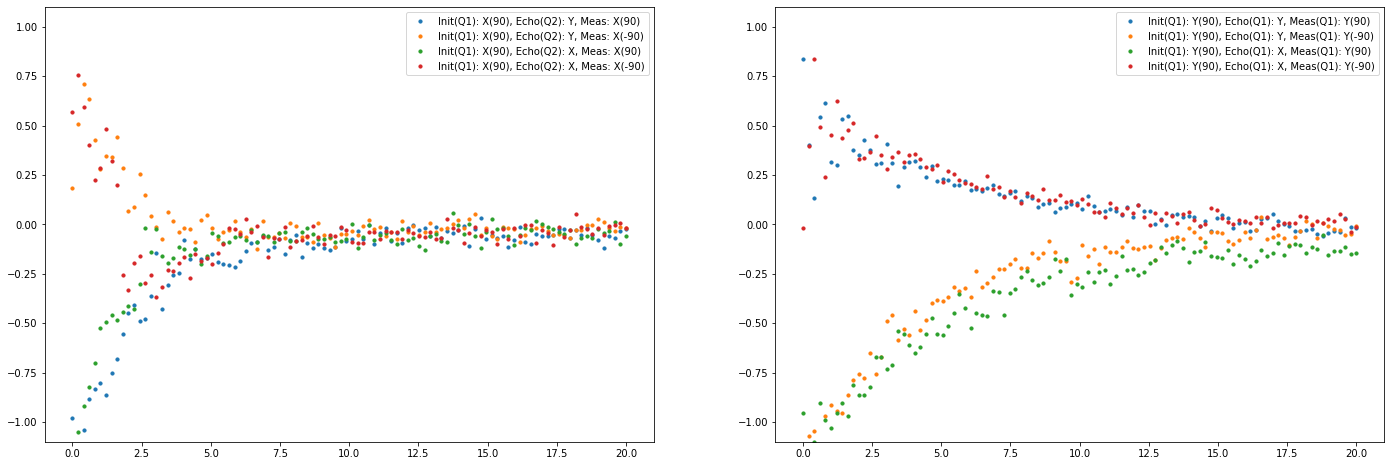

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(24,8))

labels = ['Init(Q1): X(90), Echo(Q2): Y, Meas: X(90)', 'Init(Q1): X(90), Echo(Q2): Y, Meas: X(-90)', 
          'Init(Q1): X(90), Echo(Q2): X, Meas: X(90)', 'Init(Q1): X(90), Echo(Q2): X, Meas: X(-90)']
x = np.linspace(0,20.,100)
for i in range(4):
  axes[0].scatter(x, dataset[i], s=10, label=labels[i])
axes[0].set_ylim(-1.1,1.1)
axes[0].legend()

labels = ['Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(90)', 'Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(-90)', 
          'Init(Q1): Y(90), Echo(Q1): X, Meas(Q1): Y(90)', 'Init(Q1): Y(90), Echo(Q1): X, Meas(Q1): Y(-90)']

for i in range(4):
  axes[1].scatter(x, dataset[i+4], s=10, label=labels[i])
axes[1].set_ylim(-1.1,1.1)
axes[1].legend()
plt.show()

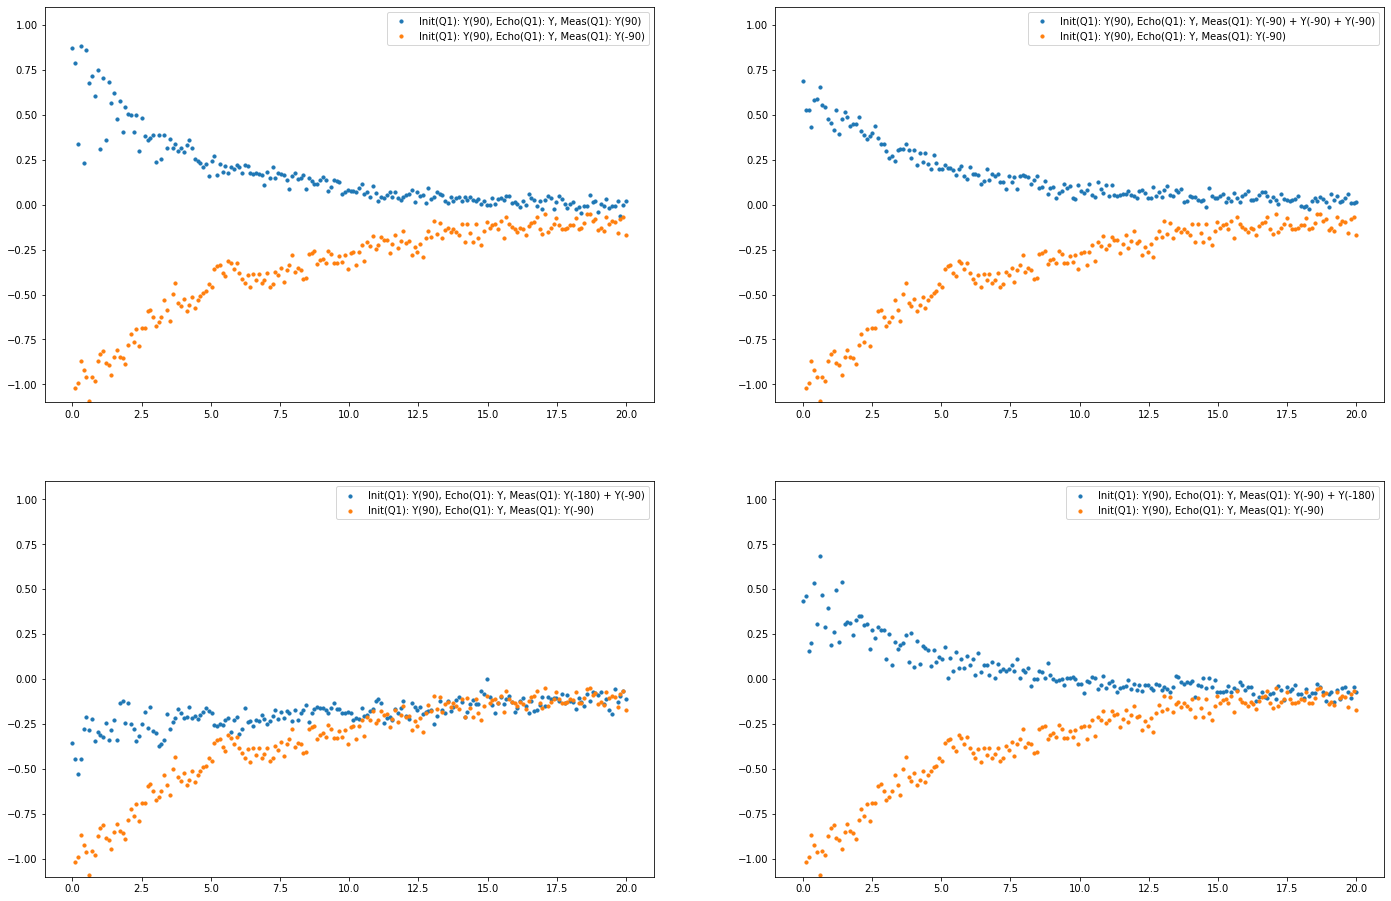

In [14]:
labels = ['Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(90)', 'Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(-90)']
x = np.linspace(0,20.,200)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(24,16))
axes[0,0].scatter(x, dataset[11], s=10, label=labels[0])
axes[0,0].scatter(x, dataset[12], s=10, label=labels[1])
axes[0,0].set_ylim(-1.1,1.1)
axes[0,0].legend()

labels = ['Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(-90) + Y(-90) + Y(-90)', 'Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(-90)']

axes[0,1].scatter(x, dataset[10], s=10, label=labels[0])
axes[0,1].scatter(x, dataset[12], s=10, label=labels[1])
axes[0,1].set_ylim(-1.1,1.1)
axes[0,1].legend()

labels = ['Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(-180) + Y(-90)', 'Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(-90)']

x = np.linspace(0,20.,200)

axes[1,0].scatter(x, dataset[8], s=10, label=labels[0])
axes[1,0].scatter(x, dataset[12], s=10, label=labels[1])
axes[1,0].set_ylim(-1.1,1.1)
axes[1,0].legend()

labels = ['Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(-90) + Y(-180)', 'Init(Q1): Y(90), Echo(Q1): Y, Meas(Q1): Y(-90)']

axes[1,1].scatter(x, dataset[9], s=10, label=labels[0])
axes[1,1].scatter(x, dataset[12], s=10, label=labels[1])
axes[1,1].set_ylim(-1.1,1.1)
axes[1,1].legend()
plt.show()

# Test

# Function test

+i, -


/usr/local/lib/python3.6/dist-packages/numpy/fft/_pocketfft.py:77: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/content/drive/My Drive/Research/qutip_sim/custom_files/analysis_tools/operation.py:191: RuntimeWarning: divide by zero encountered in true_divide
  fit = amp*np.exp(-t/decay)*np.sin(2.*np.pi*omega*t+phi)+offset
/content/drive/My Drive/Research/qutip_sim/custom_files/analysis_tools/operation.py:191: RuntimeWarning: invalid value encountered in true_divide
  fit = amp*np.exp(-t/decay)*np.sin(2.*np.pi*omega*t+phi)+offset
/content/drive/My Drive/Research/qutip_sim/custom_files/analysis_tools/operation.py:191: RuntimeWarning: overflow encountered in exp
  fit = amp*np.exp(-t/decay)*np.sin(2.*np.pi*omega*t+phi)+offset
/usr/local/lib/python3.6/dist-packages/scipy/optimize/optimize.py:697: RuntimeWarning: invalid value encountered in double_scalars
  df = (f(*((xk + d,) + args)) - f0) / d[k]


Initial state: +
Data: 1
Data: 1 QST


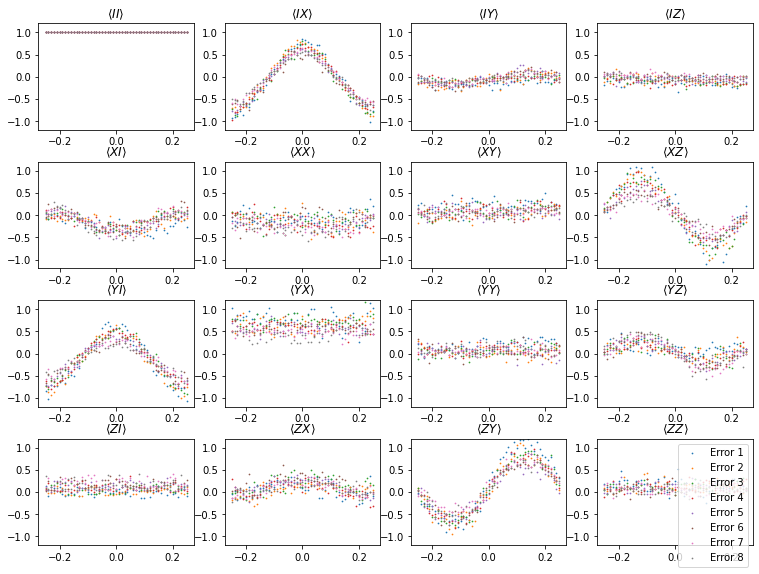

+i, -
Initial state: +
Data: 2
Data: 2 QST


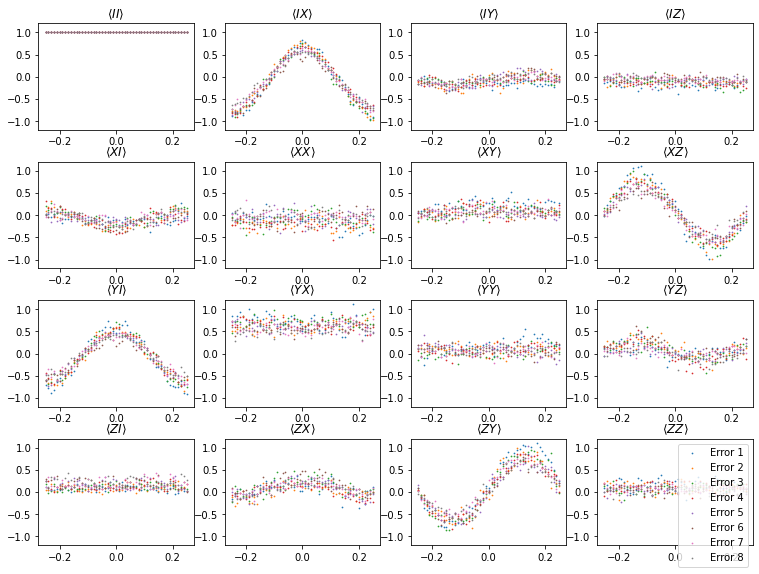

Averaged QST


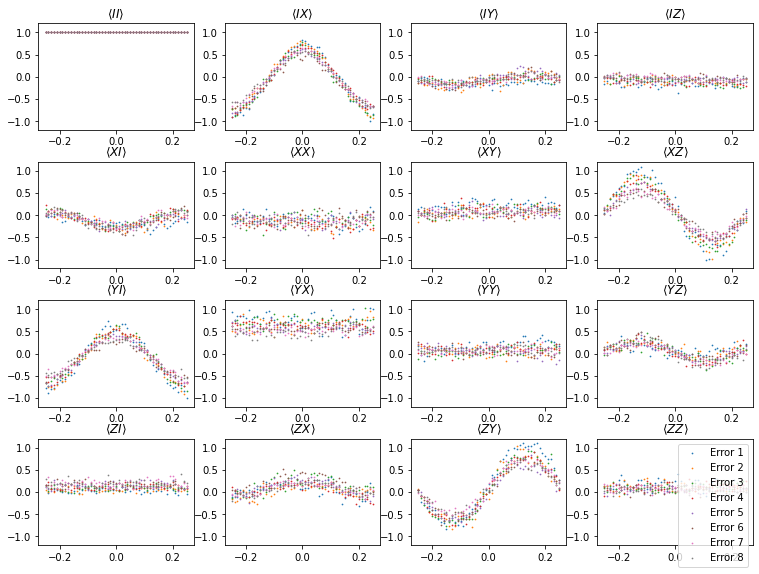

-i, +
Initial state: -
Data: 1
Data: 1 QST


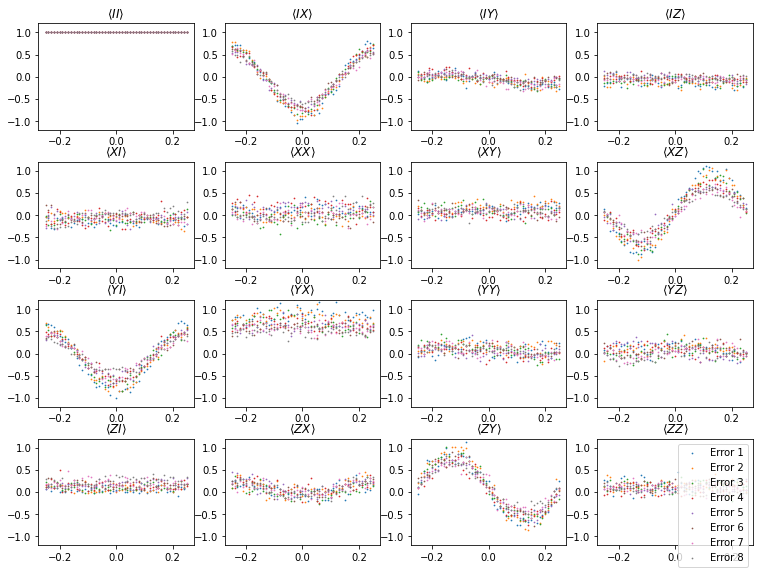

-i, +
Initial state: -
Data: 2
Data: 2 QST


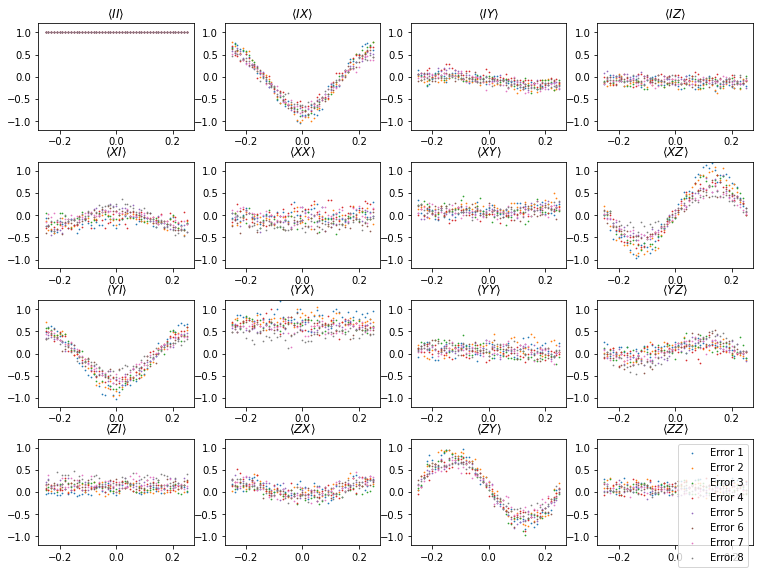

Averaged QST


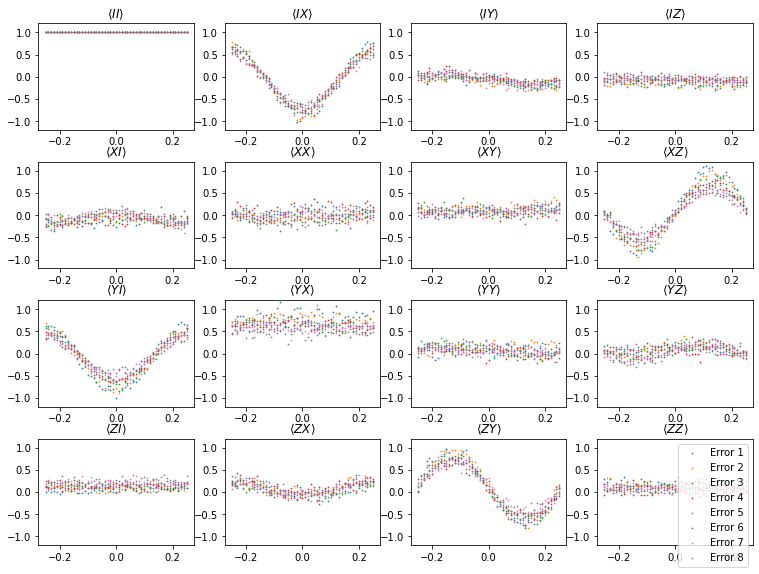

-, +i
Initial state: -
Data: 1
Data: 1 QST


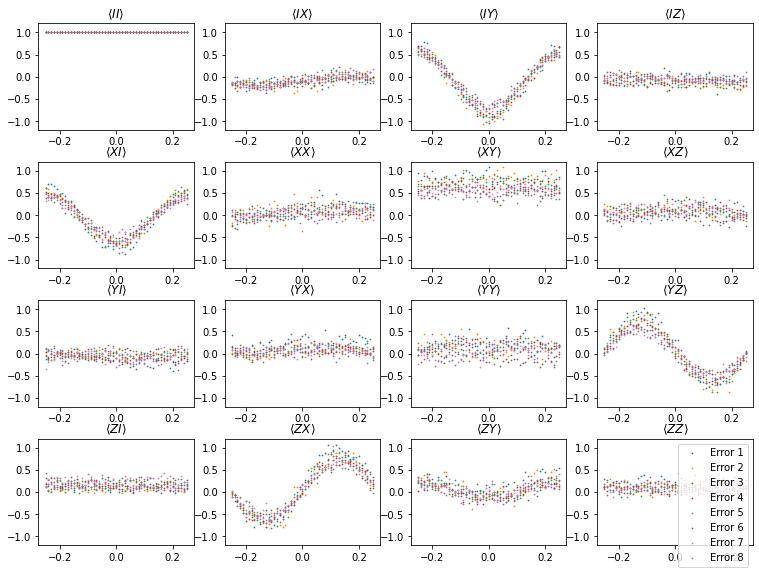

-, +i
Initial state: -
Data: 2
Data: 2 QST


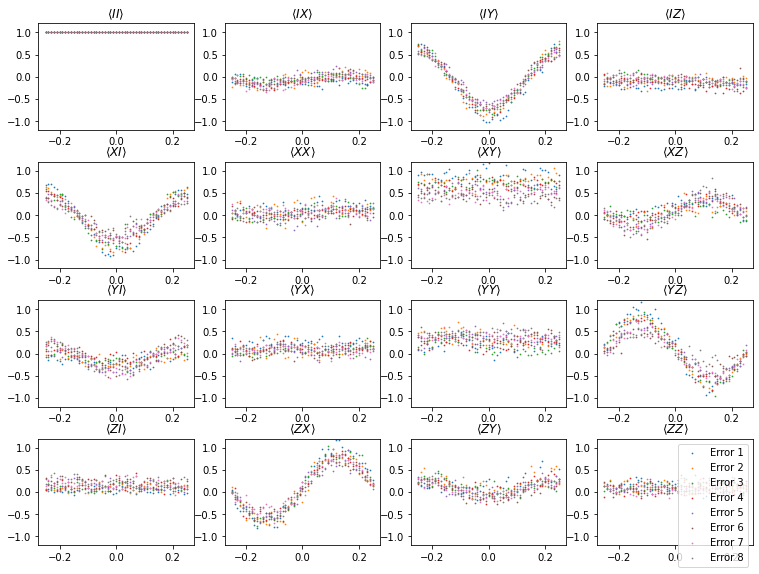

Averaged QST


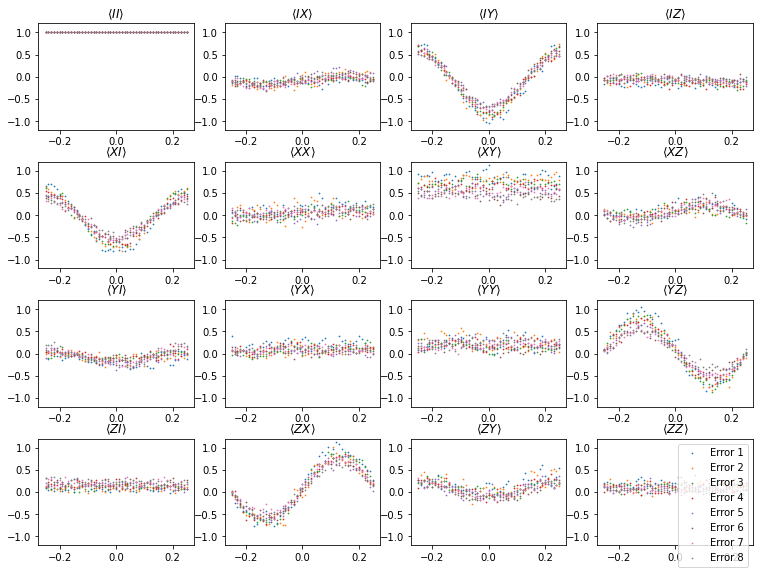

+, -i
Initial state: +
Data: 1
Data: 1 QST


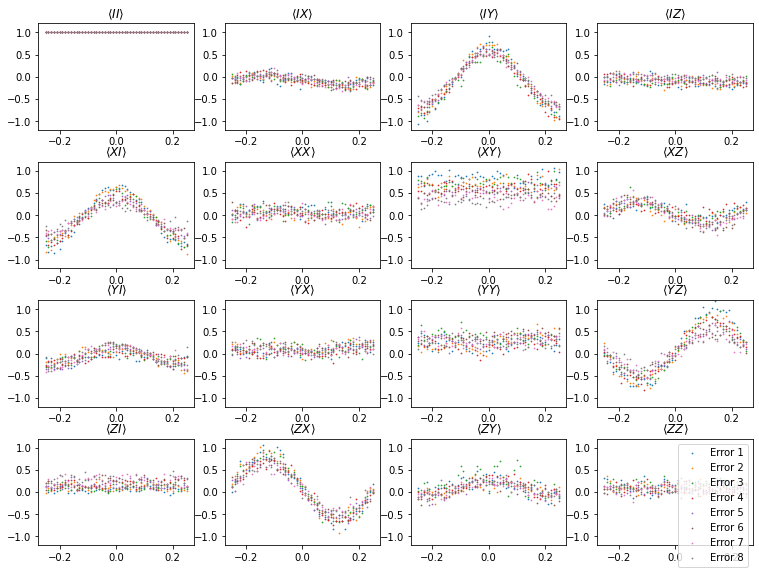

+, -i
Initial state: +
Data: 2
Data: 2 QST


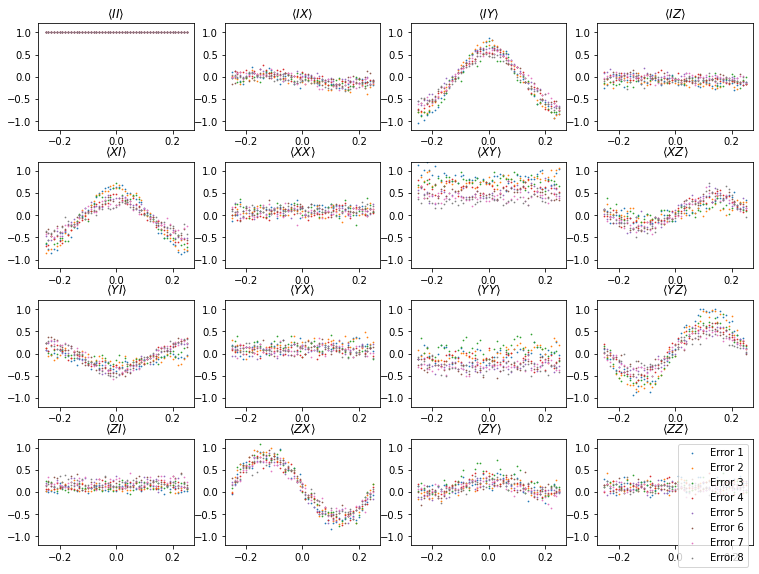

Averaged QST


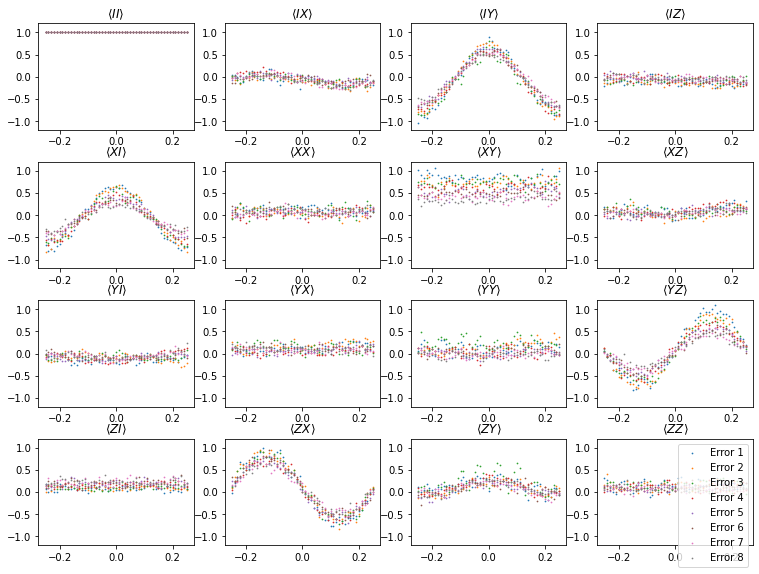

+, +i
Initial state: +
Data: 1
Data: 1 QST


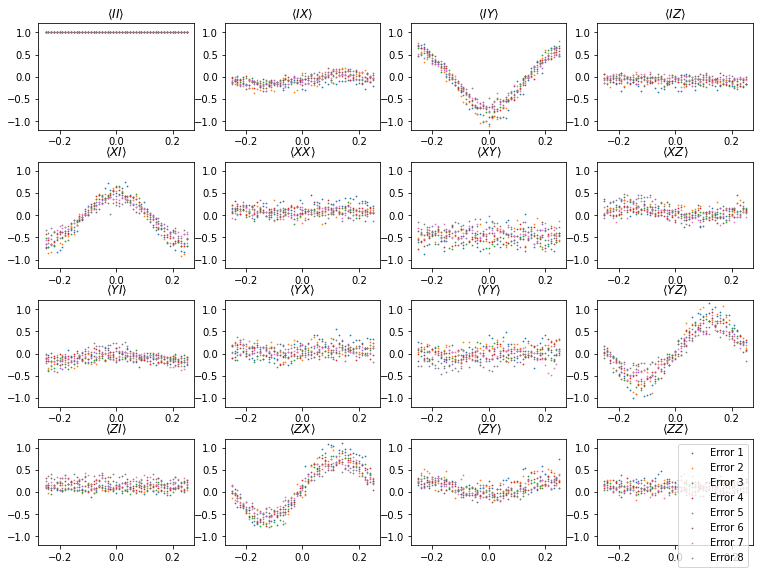

+, +i
Initial state: +
Data: 2
Data: 2 QST


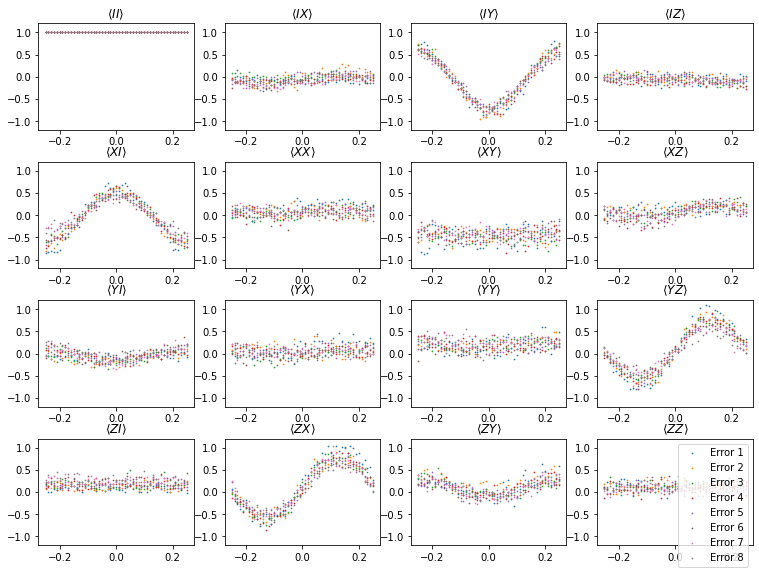

Averaged QST


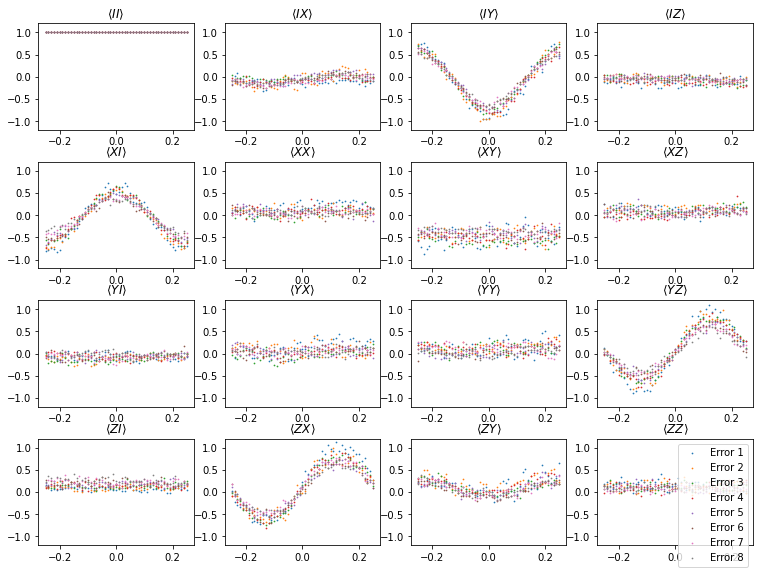

-, -i
Initial state: -
Data: 1
Data: 1 QST


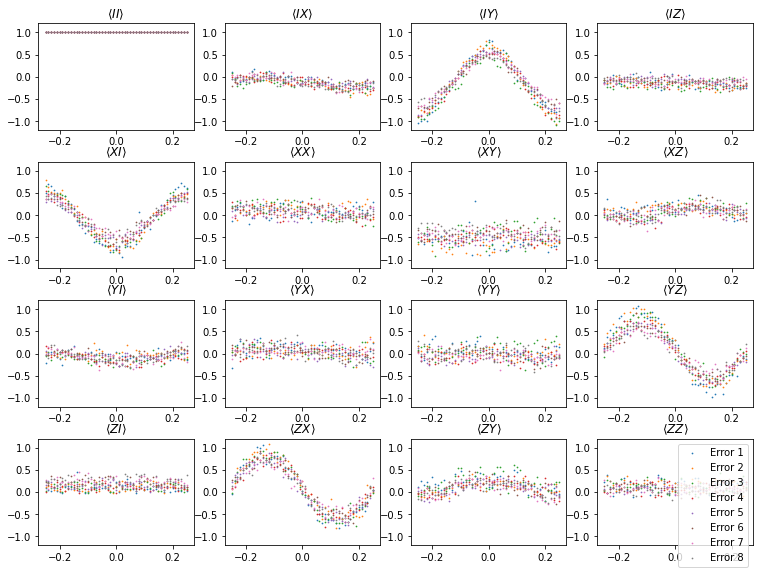

-, -i
Initial state: -
Data: 2
Data: 2 QST


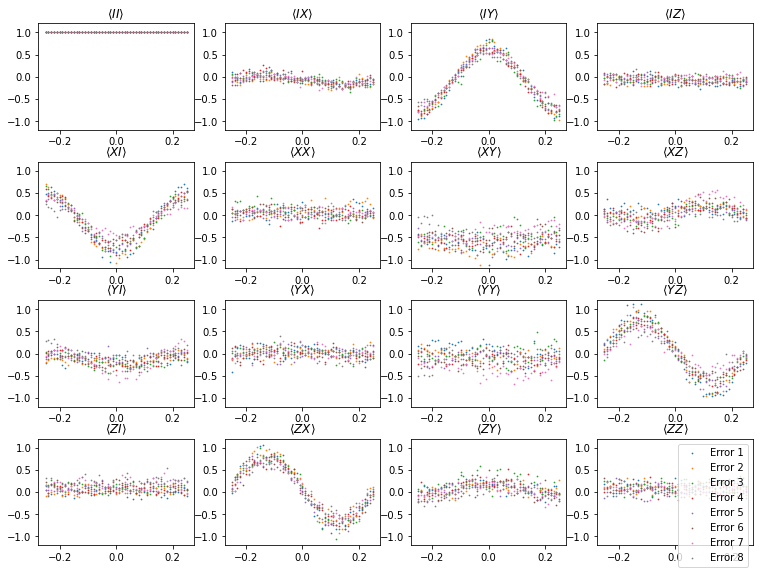

Averaged QST


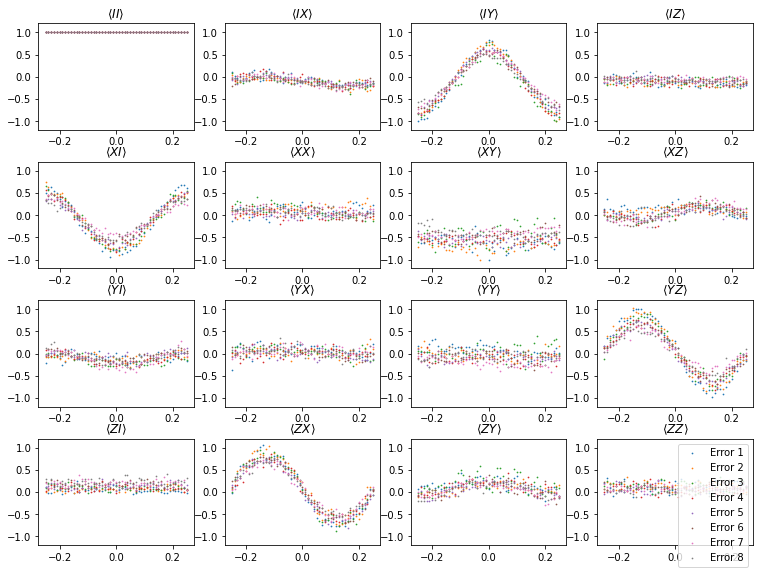

+i, +
Initial state: +
Data: 1
Data: 1 QST


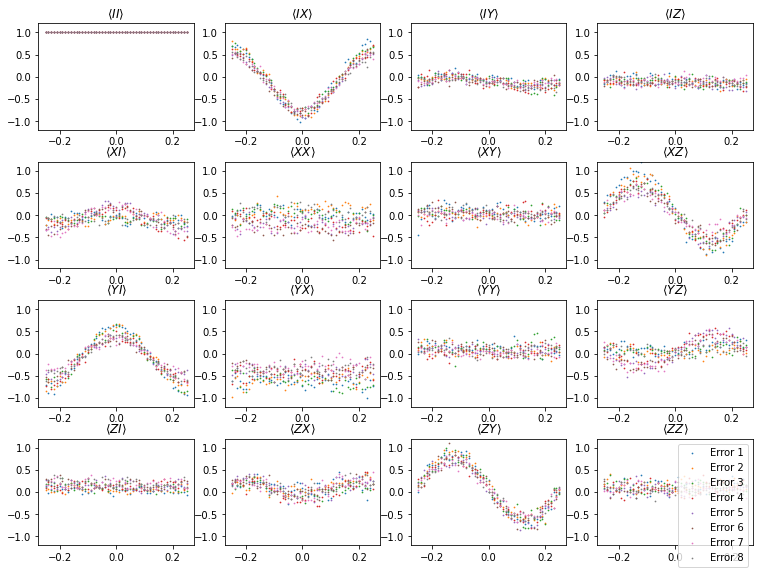

+i, +
Initial state: +
Data: 2
Data: 2 QST


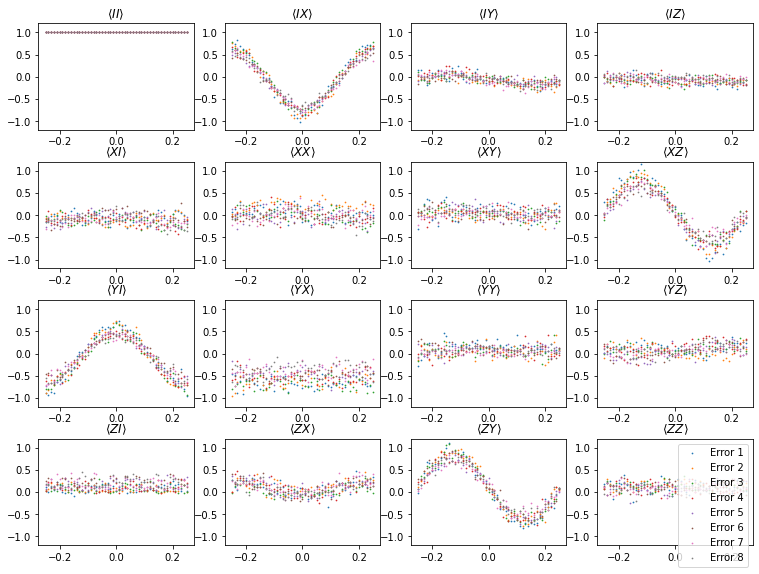

Averaged QST


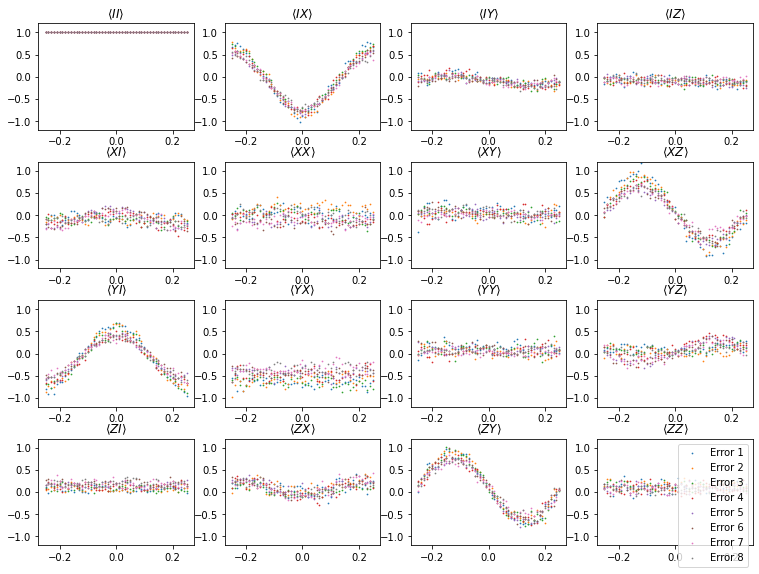

-i, -
Initial state: -
Data: 1
Data: 1 QST


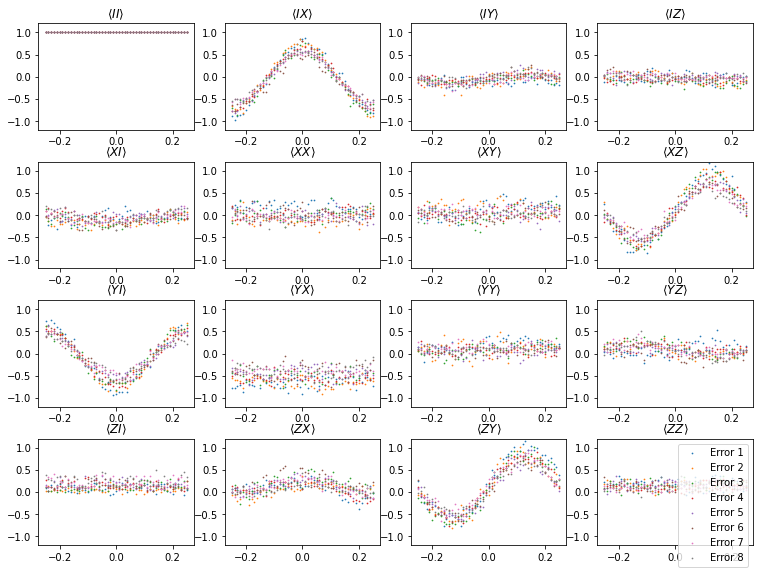

-i, -
Initial state: -
Data: 2
Data: 2 QST


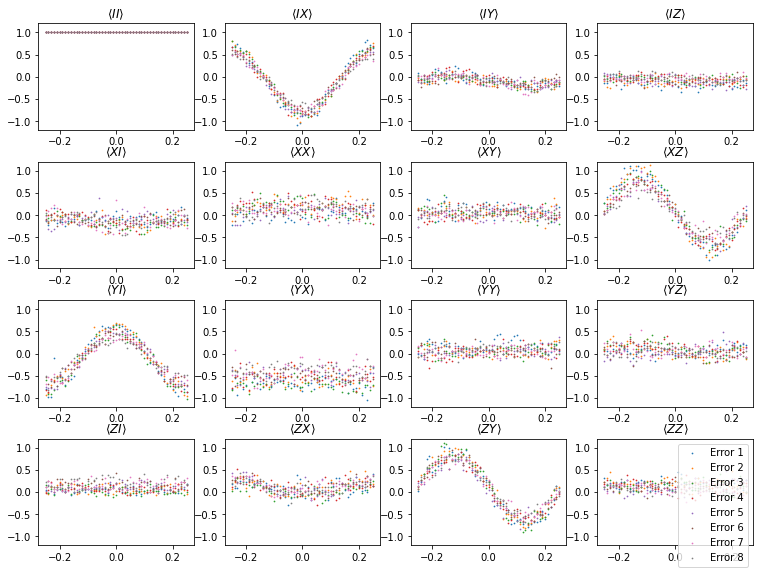

Averaged QST


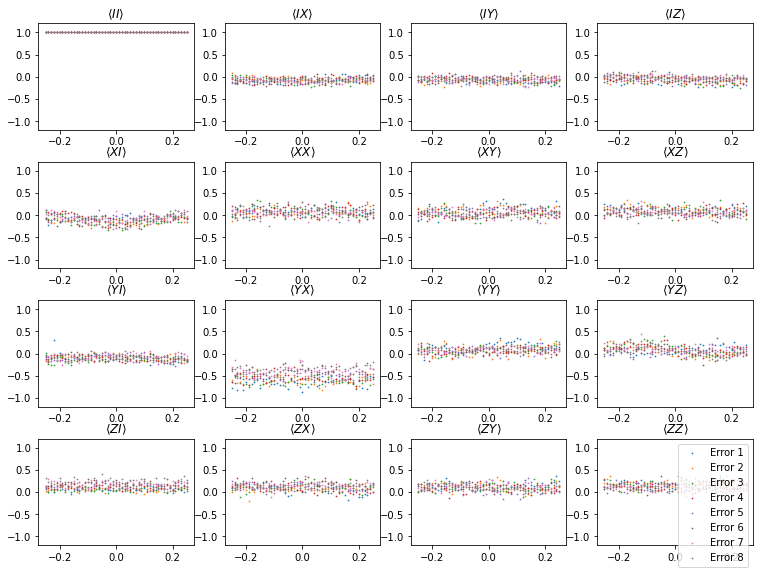

Averaged QST


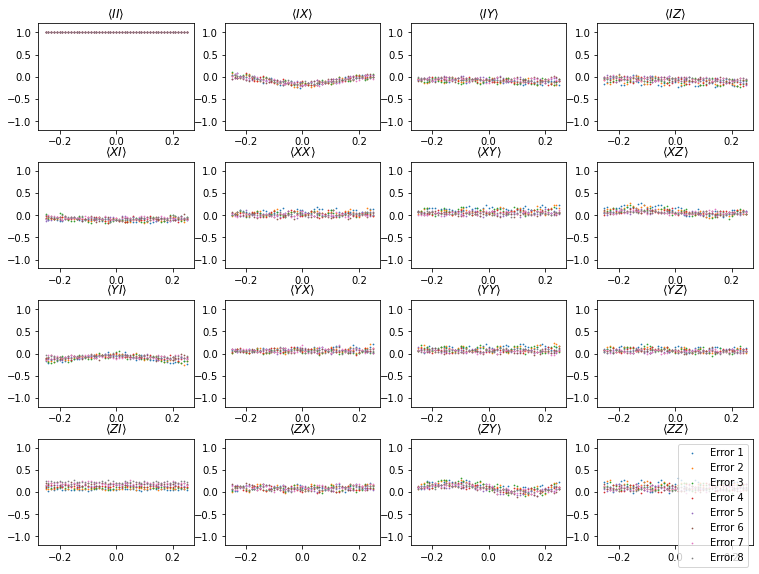

In [ ]:
directory1 = '/content/drive/My Drive/Research/Data/Experiment/VQE/VQE_tunedup_twirling/Nov21/pim'
directory2 = '/content/drive/My Drive/Research/Data/Experiment/VQE/VQE_tunedup_twirling/Nov21/mip'
directory3 = '/content/drive/My Drive/Research/Data/Experiment/VQE/VQE_tunedup_twirling/Nov21/mpi'
directory4 = '/content/drive/My Drive/Research/Data/Experiment/VQE/VQE_tunedup_twirling/Nov21/pmi'
directory5 = '/content/drive/My Drive/Research/Data/Experiment/VQE/VQE_tunedup_twirling/Nov21/ppi'
directory6 = '/content/drive/My Drive/Research/Data/Experiment/VQE/VQE_tunedup_twirling/Nov21/mmi'
directory7 = '/content/drive/My Drive/Research/Data/Experiment/VQE/VQE_tunedup_twirling/Nov21/pip'
directory8 = '/content/drive/My Drive/Research/Data/Experiment/VQE/VQE_tunedup_twirling/Nov21/mim'

directories = [directory1, directory2, directory3, directory4, directory5, directory6, directory7, directory8]
init_list = ['+i, -', '-i, +', '-, +i', '+, -i', '+, +i', '-, -i', '+i, +', '-i, -']

tomo_4_4, pauli_vqe, theta = vqe_exp_multi(directories, file_name='-echo_vqe_v5.run/', file_list=range(1,3,1), init_list=init_list, plot_qst=True, plot_bloch=True, plot_energy=False, plot_error_mitigation=None, plot_everything=True) # [np.linspace(1, 4.5, 8), 'linear']